In [1]:
import pandas as pd
import array
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import seaborn as sns; sns.set()
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import linregress


In [2]:
data = pd.read_csv("Data After Cleaning.csv")

In [3]:
#Feature Transformation
data[["Analisis Numerik", "Logika","Pemrograman Web","Teknologi dan Aplikasi Mobile","Keamanan Sistem Informasi","Sistem Informasi Geografis","Multimedia","Data Warehouse","Pengujian Perangkat Lunak","Pemrosesan Bahasa Alami","Manajemen Pengetahuan","Aljabar Linear", "Dasar-Dasar Pemrograman", "Matematika","Statistika dan Probabilitas",
        "Matematika Diskrit", "Pemrograman Terstruktur","Pengantar Organisasi Komputer", "Pengantar Sistem Digital", "Pengantar Sistem Informasi", "Rekayasa Perangkat Lunak",
        "Sistem Operasi", "Interaksi Manusia dan Komputer", "Komunikasi Data dan Jaringan Komputer", "Basis Data", "Pemrograman Berorientasi Objek", "Struktur Data dan Algoritma", "Desain dan Analisis Algoritma","Kecerdasan Buatan","Proses Dan Kualitas Perangkat Lunak","Analisis Dan Desain Sistem Informasi","Tata Kelola Dan AUDIT TI",
        "Pengenalan Pola", "Teori Bahasa dan Automata", "Manajemen Proyek"]] = data[["Analisis Numerik", "Logika","Pemrograman Web","Teknologi dan Aplikasi Mobile","Keamanan Sistem Informasi","Sistem Informasi Geografis","Multimedia","Data Warehouse","Pengujian Perangkat Lunak","Pemrosesan Bahasa Alami","Manajemen Pengetahuan","Aljabar Linear", "Dasar-Dasar Pemrograman", "Matematika","Statistika dan Probabilitas",
        "Matematika Diskrit", "Pemrograman Terstruktur","Pengantar Organisasi Komputer", "Pengantar Sistem Digital", "Pengantar Sistem Informasi", "Rekayasa Perangkat Lunak",
        "Sistem Operasi", "Interaksi Manusia dan Komputer", "Komunikasi Data dan Jaringan Komputer", "Basis Data", "Pemrograman Berorientasi Objek", "Struktur Data dan Algoritma", "Desain dan Analisis Algoritma","Kecerdasan Buatan","Proses Dan Kualitas Perangkat Lunak","Analisis Dan Desain Sistem Informasi","Tata Kelola Dan AUDIT TI",
        "Pengenalan Pola", "Teori Bahasa dan Automata", "Manajemen Proyek"]].replace(["A","B+","B","C+","C","D","E"], [4,3.5,3,2.5,2,1,0])
#data["kategori"]=data["kategori"].replace(["AI","AR","Audit","CVIS","DSS","Data Science","Jaringan/Security","Komputasi","Mobile","RPL","SI","SIG","Sistem Pakar","TKI"], [1,2,3,4,5,6,7,8,9,10,11,12,13,14])

with pd.ExcelWriter('path_to_file.xlsx') as writer:
    data.to_excel(writer)

In [4]:
#Korelasi
#plt.figure(figsize=(50,45))
#korelasi=data.corr()

#matrix = np.triu(data.corr())
#sns.heatmap(korelasi, annot = True, mask=matrix, vmin=-1, vmax=1, center= 0)
#plt.savefig('yourTitle.png')
#plt.show()
#data=data.drop(['statistika','kec_buatan','pkpl','aplikasi_mobile','ppl','sistem_operasi','logika','daa','logika','pemweb','pba','psi','strukdat','adsi'], axis = 1)


In [5]:
data=data.drop(['Statistika dan Probabilitas'], axis = 1)

In [6]:
#Korelasi
#plt.figure(figsize=(50,45))
#korelasi=data.corr()

#matrix = np.triu(data.corr())
#sns.heatmap(korelasi, annot = True, mask=matrix, vmin=-1, vmax=1, center= 0)
#plt.savefig('AFTER KORELASI.png')
#plt.show()
#data=data.drop(['statistika','kec_buatan','pkpl','aplikasi_mobile','ppl','sistem_operasi','logika','daa','logika','pemweb','pba','psi','strukdat','adsi'], axis = 1)


In [7]:
# Variabel independen
x = data.drop(["Kategori"], axis = 1)
# Variabel dependen
y = data["Kategori"]
#y,levels = pd.factorize(data['Kategori'])
counter = Counter(y)
print(counter)

Counter({'Sistem Informasi': 53, 'Mobile': 31, 'Sistem Pakar': 30, 'Rekayasa Perangkat Lunak': 23, 'Audit': 19, 'Computer Vision': 15, 'Sistem Informasi Geografi': 12, 'Decision Support Systems': 12, 'Komputasi': 10, 'Augmented Reality': 10, 'Jaringan/Security': 8, 'Data Science': 6, 'Temu Kembali Informasi': 6, 'Artificial Intelligence': 5})


<AxesSubplot:xlabel='Kategori', ylabel='count'>

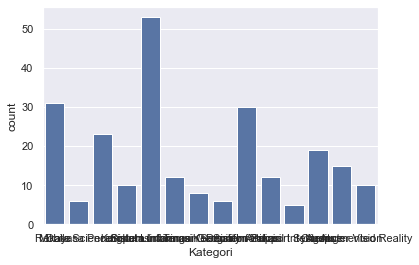

In [20]:
#BEFORE SMOTE
#plt.figure(figsize=(10,12))
sns.countplot(x='Kategori',data=data, color='b')
#plt.xlabel('Kategori', size=14)
#plt.ylabel('Jumlah', size=14)
#plt.xticks(rotation = 45, ha = 'right')
#plt.savefig('beforeSmote.png')

In [9]:
#Smote
k=3
sm= SMOTE(k_neighbors=k, random_state=42)
x, y =sm.fit_resample(x, y)
counter = Counter(y)
print(counter)

Counter({'Mobile': 53, 'Data Science': 53, 'Rekayasa Perangkat Lunak': 53, 'Komputasi': 53, 'Sistem Informasi': 53, 'Sistem Informasi Geografi': 53, 'Jaringan/Security': 53, 'Temu Kembali Informasi': 53, 'Sistem Pakar': 53, 'Decision Support Systems': 53, 'Artificial Intelligence': 53, 'Audit': 53, 'Computer Vision': 53, 'Augmented Reality': 53})


In [10]:
#Setelah SMOTE
#count = y.value_counts()
#plt.figure(figsize=(10, 12))

# create bar plot
#plt.bar(['Mobile','Data Science','RPL','Komputasi','SI','SIG','Jaringan/Security','TKI','Sistem Pakar','DSS','AI','Audit','CVIS','AR'], count, color='b')

#plt.xlabel('Kategori', size=14)
#plt.ylabel('Jumlah', size=14)
#plt.xticks(rotation = 45, ha = 'right')
#plt.savefig('afterSmote.png')
#plt.show()

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size = 0.1, random_state=0)
#counter = Counter(y)
#print(counter 

In [12]:
#Pipeline menyimpan semua tahapan alur kerja sebagai satu objek yang dapat dipanggil dengan metode fit and predict. Saat Anda menjalankan metode fit pada objek pipeline, langkah-langkah preprocessing dan model training dilakukan secara otomatis.

#pipeline = Pipeline([
#    ('clf', GaussianNB())
#])
clf = GaussianNB()

parameters = {
    #'var_smoothing': np.logspace(0,-9, num=100)
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11]
}

In [13]:
#GridSearchCV
model = GridSearchCV(clf, parameters, cv=10, n_jobs=-1, verbose=1)

In [14]:
model.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                           1e-07, 1e-08, 1e-09, 1e-10, 1e-11]},
             verbose=1)

In [15]:
results_df = pd.DataFrame(model.cv_results_)
results_df = results_df.sort_values(by=['rank_test_score'])
results_df = (
    results_df
    .set_index(results_df["params"].apply(
        lambda x: "_".join(str(val) for val in x.values()))
    )
    .rename_axis('var_smoothing')
)
results_df[
    ['params', 'rank_test_score', 'mean_test_score', 'std_test_score']
]

,params,rank_test_score,mean_test_score,std_test_score
var_smoothing,,,,
1e-08,{'var_smoothing': 1e-08},1,0.545613,0.058409
1e-09,{'var_smoothing': 1e-09},2,0.544120,0.059169
1e-07,{'var_smoothing': 1e-07},3,0.544098,0.060137
0.001,{'var_smoothing': 0.001},4,0.544075,0.057702
1e-10,{'var_smoothing': 1e-10},5,0.542628,0.058756
0.0001,{'var_smoothing': 0.0001},6,0.542583,0.057277
1e-05,{'var_smoothing': 1e-05},7,0.541090,0.059491
1e-06,{'var_smoothing': 1e-06},7,0.541090,0.058737
0.01,{'var_smoothing': 0.01},9,0.539575,0.061009


In [16]:
model.best_score_

0.5456128448665762

In [17]:
model.best_estimator_

GaussianNB(var_smoothing=1e-08)

In [18]:
model.best_params_

{'var_smoothing': 1e-08}

model.cv_results_

#Confusion Matrix
y_pred = model.predict(x)
confusion_matrix(levels[y],levels[y_pred])
print(classification_report(levels[y],levels[y_pred]))
print(accuracy_score(y, y_pred))
#print(confusion_matrix(levels[y_test],levels[y_pred]))

In [19]:
y_pred = model.predict(x_test)
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

                           precision    recall  f1-score   support

  Artificial Intelligence       0.71      0.83      0.77         6
                    Audit       0.50      0.40      0.44         5
        Augmented Reality       0.27      0.60      0.37         5
          Computer Vision       0.62      0.83      0.71         6
             Data Science       0.83      1.00      0.91         5
 Decision Support Systems       1.00      0.67      0.80         6
        Jaringan/Security       0.83      1.00      0.91         5
                Komputasi       0.50      0.80      0.62         5
                   Mobile       0.00      0.00      0.00         5
 Rekayasa Perangkat Lunak       1.00      0.40      0.57         5
         Sistem Informasi       0.50      0.17      0.25         6
Sistem Informasi Geografi       0.33      0.40      0.36         5
             Sistem Pakar       0.29      0.33      0.31         6
   Temu Kembali Informasi       0.67      0.40      0.50     

<AxesSubplot:>

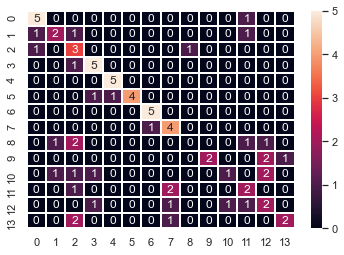

In [20]:
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g')

<function matplotlib.pyplot.show(close=None, block=None)>

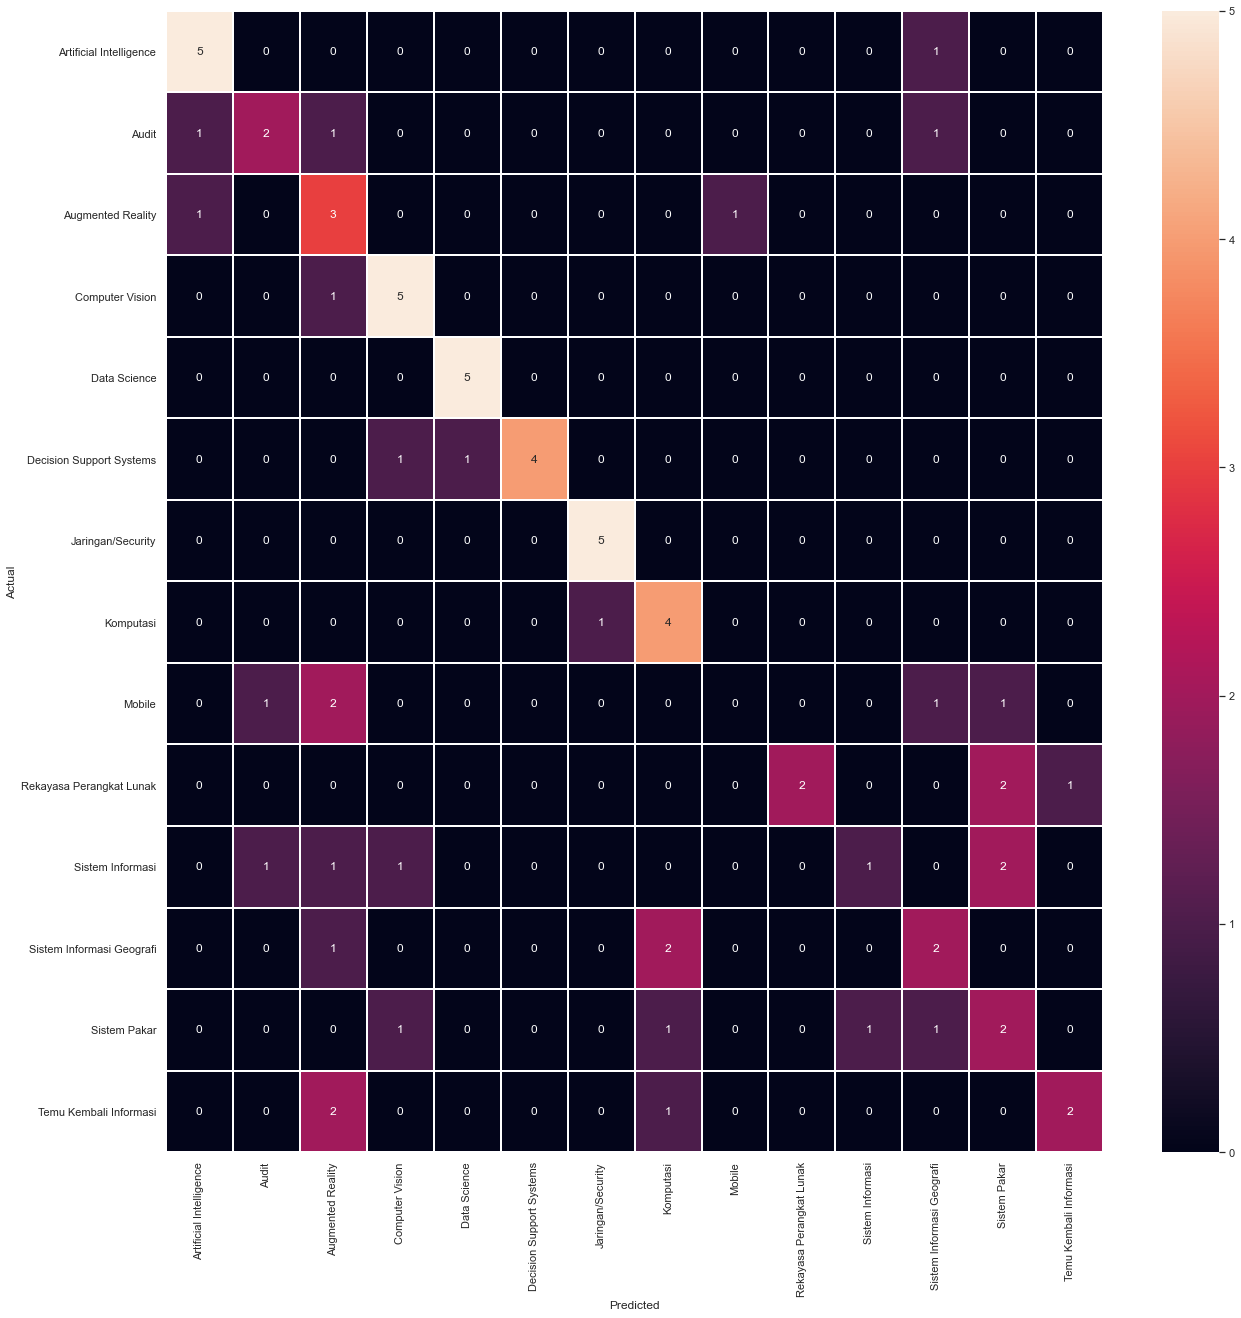

In [21]:
fig, ax = plt.subplots(figsize=(21,21)) 
cnf = pd.crosstab(y_test,y_pred)
gn=sns.heatmap(cnf, linewidths=1, annot=True, ax=ax, fmt='g')
gn.set(xlabel='Predicted')
gn.set(ylabel='Actual')
plt.savefig('cm.png')
plt.show

pd.DataFrame(model.cv_results_).sort_values("rank_test_score")

In [22]:
list_data= [['4','4','3','4','4','4','2.5','3','2.5','0','4','2','2','4','3.5','3','4','4','4','3','4','3','3','3.5',
            '4','4','3.5','4','3','0','4','0','0','0']]
data_uji=pd.DataFrame(list_data,columns=["Analisis Numerik","Logika","Pemrograman Web","Teknologi dan Aplikasi Mobile","Keamanan Sistem Informasi","Sistem Informasi Geografis","Multimedia","Data Warehouse","Pengujian Perangkat Lunak","Pemrosesan Bahasa Alami","Manajemen Pengetahuan","Aljabar Linear", "Dasar-Dasar Pemrograman", "Matematika",
        "Matematika Diskrit", "Pemrograman Terstruktur","Pengantar Organisasi Komputer", "Pengantar Sistem Digital", "Pengantar Sistem Informasi", "Rekayasa Perangkat Lunak",
        "Sistem Operasi", "Interaksi Manusia dan Komputer", "Komunikasi Data dan Jaringan Komputer", "Basis Data", "Pemrograman Berorientasi Objek", "Struktur Data dan Algoritma", "Desain dan Analisis Algoritma","Kecerdasan Buatan","Proses Dan Kualitas Perangkat Lunak","Analisis Dan Desain Sistem Informasi","Tata Kelola Dan AUDIT TI",
        "Pengenalan Pola", "Teori Bahasa dan Automata", "Manajemen Proyek"])
data_uji

,Analisis Numerik,Logika,Pemrograman Web,Teknologi dan Aplikasi Mobile,Keamanan Sistem Informasi,Sistem Informasi Geografis,Multimedia,Data Warehouse,Pengujian Perangkat Lunak,Pemrosesan Bahasa Alami,...,Pemrograman Berorientasi Objek,Struktur Data dan Algoritma,Desain dan Analisis Algoritma,Kecerdasan Buatan,Proses Dan Kualitas Perangkat Lunak,Analisis Dan Desain Sistem Informasi,Tata Kelola Dan AUDIT TI,Pengenalan Pola,Teori Bahasa dan Automata,Manajemen Proyek
0,4,4,3,4,4,4,2.5,3,2.5,0,...,4,4,3.5,4,3,0,4,0,0,0


In [23]:
y_pred_uji=model.predict(data_uji)
print(y_pred_uji)

['Sistem Pakar']
